<a href="https://colab.research.google.com/github/AlexisDclqt/Code_Projet_Co2_/blob/main/Etude_exploratoire_(Thermique%2C_Electrique%2C_Composition_du_parc_automobile).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Data_Co2_Clean_AVEC_OUTLIERS_BEFORE_SAMPLE.csv')

# Visualisation des données de 2024
df.head(10)


,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
0,148534149,FORD,FOCUS,1523.0,121.0,Essence,92.0,0.0,5.3,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
1,148534150,OPEL,VIVARO,2454.0,0.0,Electric,100.0,244.0,0.0,343.0,Netherlands,A,Q4_Très_lourd,Q2_Moyen
2,148534151,VOLVO,S60,2176.0,16.0,Hybride Essence,186.0,163.0,0.7,93.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
3,148534152,FORD,FOCUS,1549.0,123.0,Essence,92.0,0.0,5.4,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
4,148534153,TOYOTA,TOYOTA AYGO X,1088.0,108.0,Essence,53.0,0.0,4.8,0.0,Netherlands,B,Q1_Léger,Q1_Faible
5,148534154,DACIA,SANDERO,1262.0,125.0,Essence,81.0,0.0,5.5,0.0,Netherlands,C,Q1_Léger,Q2_Moyen
6,148534155,VOLKSWAGEN,TIGUAN,2033.0,10.0,Hybride Essence,110.0,178.0,0.4,117.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
7,148534156,VOLKSWAGEN,TAIGO,1335.0,125.0,Essence,70.0,0.0,5.6,0.0,Netherlands,C,Q1_Léger,Q1_Faible
8,148534157,VOLVO,C40,2203.0,0.0,Electric,185.0,166.0,0.0,570.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
9,148534158,VOLVO,XC60,2272.0,22.0,Hybride Essence,186.0,182.0,0.9,82.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant


# 3. Visualisations et statistiques

# Etude des véhicules thermiques : essence et diesel





In [ ]:
#Création d'un DataFrame pour les véhicules thermiques

df_thermique = df[(df['Type_Carburant'] == 'Essence') | (df['Type_Carburant'] == 'Diesel')]
df_thermique = df_thermique.drop(columns=['Conso_Wh/km', 'Electric range (km)'])
df_thermique.head()


,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Fuel consumption,Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
0,148534149,FORD,FOCUS,1523.0,121.0,Essence,92.0,5.3,Netherlands,C,Q2_Moyen,Q2_Moyen
3,148534152,FORD,FOCUS,1549.0,123.0,Essence,92.0,5.4,Netherlands,C,Q2_Moyen,Q2_Moyen
4,148534153,TOYOTA,TOYOTA AYGO X,1088.0,108.0,Essence,53.0,4.8,Netherlands,B,Q1_Léger,Q1_Faible
5,148534154,DACIA,SANDERO,1262.0,125.0,Essence,81.0,5.5,Netherlands,C,Q1_Léger,Q2_Moyen
7,148534156,VOLKSWAGEN,TAIGO,1335.0,125.0,Essence,70.0,5.6,Netherlands,C,Q1_Léger,Q1_Faible


In [ ]:
# Descrition rapide de la distribution du panel de véhicules thermiques

variables_etudiees = ['WLTP_poids', 'Co2_Emission(WLTP)', 'Puissance_KW', 'Fuel consumption']
df_thermique[variables_etudiees].describe()


,WLTP_poids,Co2_Emission(WLTP),Puissance_KW,Fuel consumption
count,7.752305e+06,7.752305e+06,7.752305e+06,7.752305e+06
mean,1.563257e+03,1.343820e+02,1.020938e+02,5.753485e+00
std,3.054901e+02,2.886568e+01,4.838072e+01,1.226213e+00
min,3.170000e+02,5.500000e+01,1.000000e+01,3.000000e-01
25%,1.355000e+03,1.180000e+02,7.300000e+01,5.100000e+00
50%,1.520000e+03,1.290000e+02,9.600000e+01,5.500000e+00
75%,1.734000e+03,1.430000e+02,1.100000e+02,6.100000e+00
max,4.574000e+03,5.430000e+02,1.120000e+03,2.700000e+01


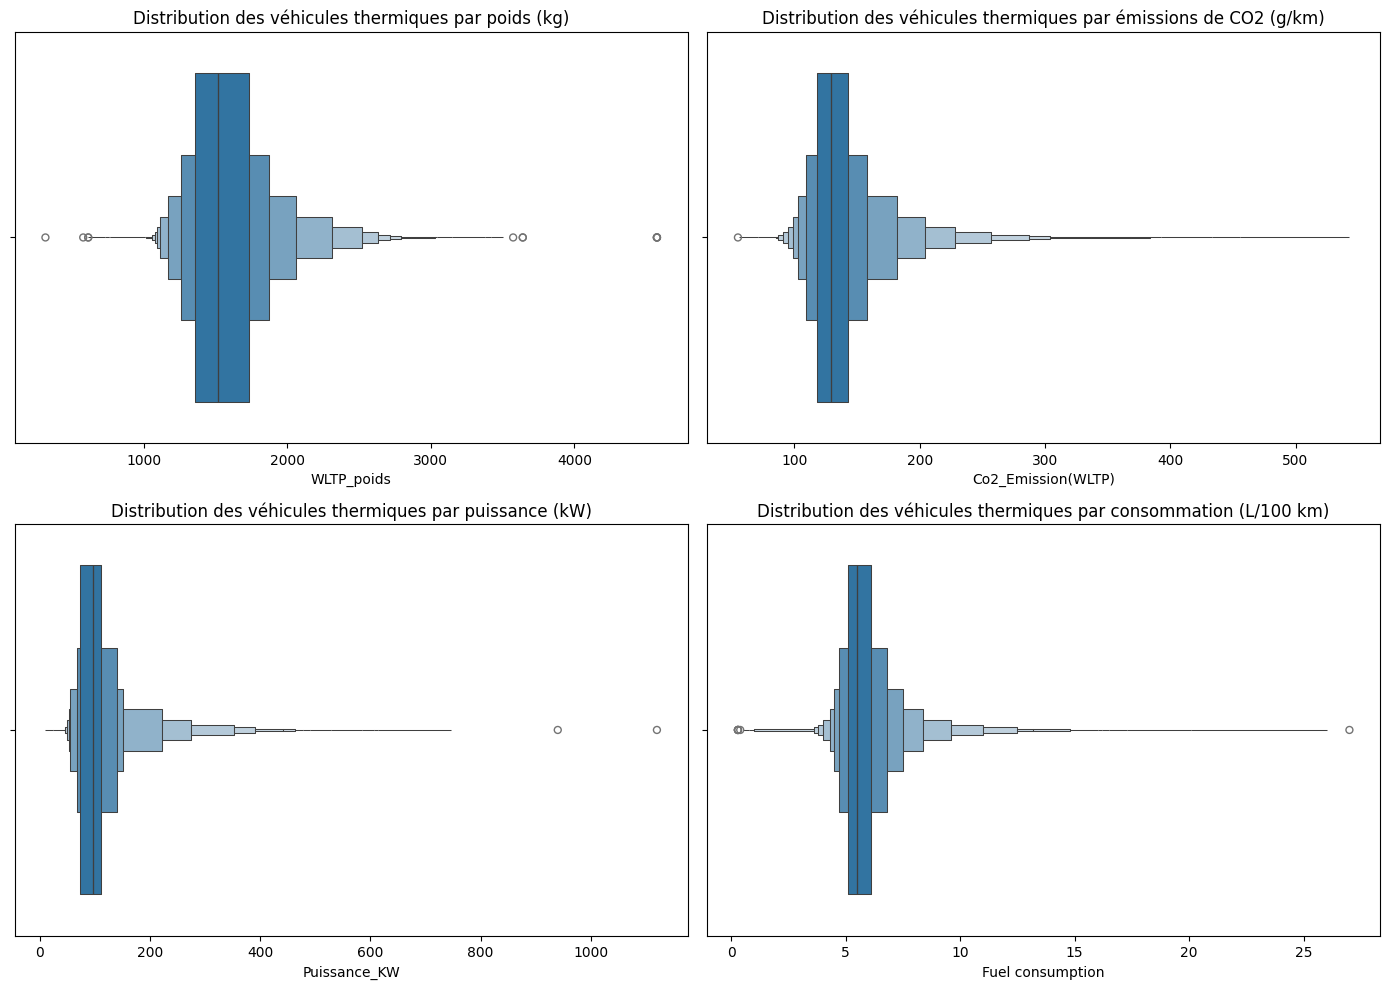

In [ ]:
# Identification et nettoyage des outliers avec des boites à moustaches pour les véhicules thermiques

colonnes = ['WLTP_poids', 'Co2_Emission(WLTP)', 'Puissance_KW', 'Fuel consumption']
titres = [
    'Distribution des véhicules thermiques par poids (kg)',
    'Distribution des véhicules thermiques par émissions de CO2 (g/km)',
    'Distribution des véhicules thermiques par puissance (kW)',
    'Distribution des véhicules thermiques par consommation (L/100 km)'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_thermique, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()



In [ ]:
# Nettoyage des outliers identifiés des véhicules thermiques

df_thermique=df_thermique.drop(df_thermique[(df_thermique['ID'] == 150808259) | (df_thermique['ID'] == 156747007)].index)
df_thermique=df_thermique.drop(df_thermique[(df_thermique['WLTP_poids'] > 3500)].index)
df_thermique=df_thermique.drop(df_thermique[(df_thermique['Fuel consumption'] > 25)].index)
df_thermique=df_thermique.drop(df_thermique[(df_thermique['Fuel consumption'] < 3)].index)


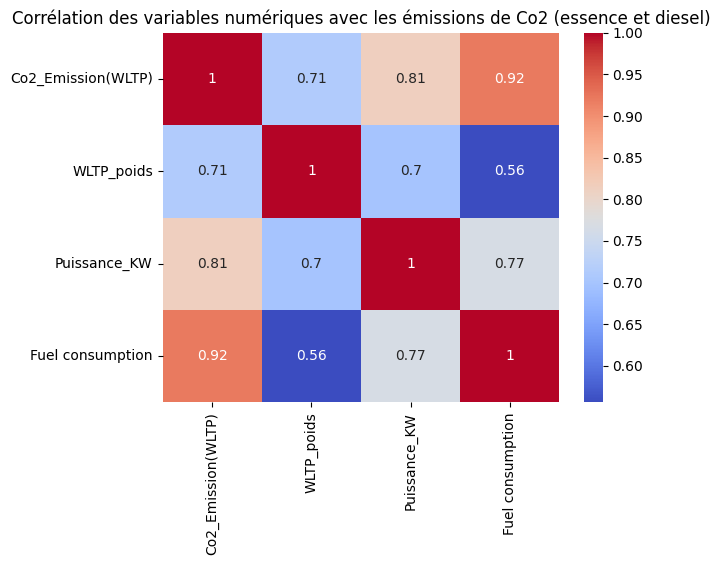

In [ ]:
# Matrice de corrélation (heatmap) entre les variables numériques des véhicules thermiques

numeric_vars = ['Co2_Emission(WLTP)', 'WLTP_poids', 'Puissance_KW', 'Fuel consumption']
corr_matrix = df_thermique[numeric_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation des variables numériques avec les émissions de Co2 (essence et diesel)')
plt.show()

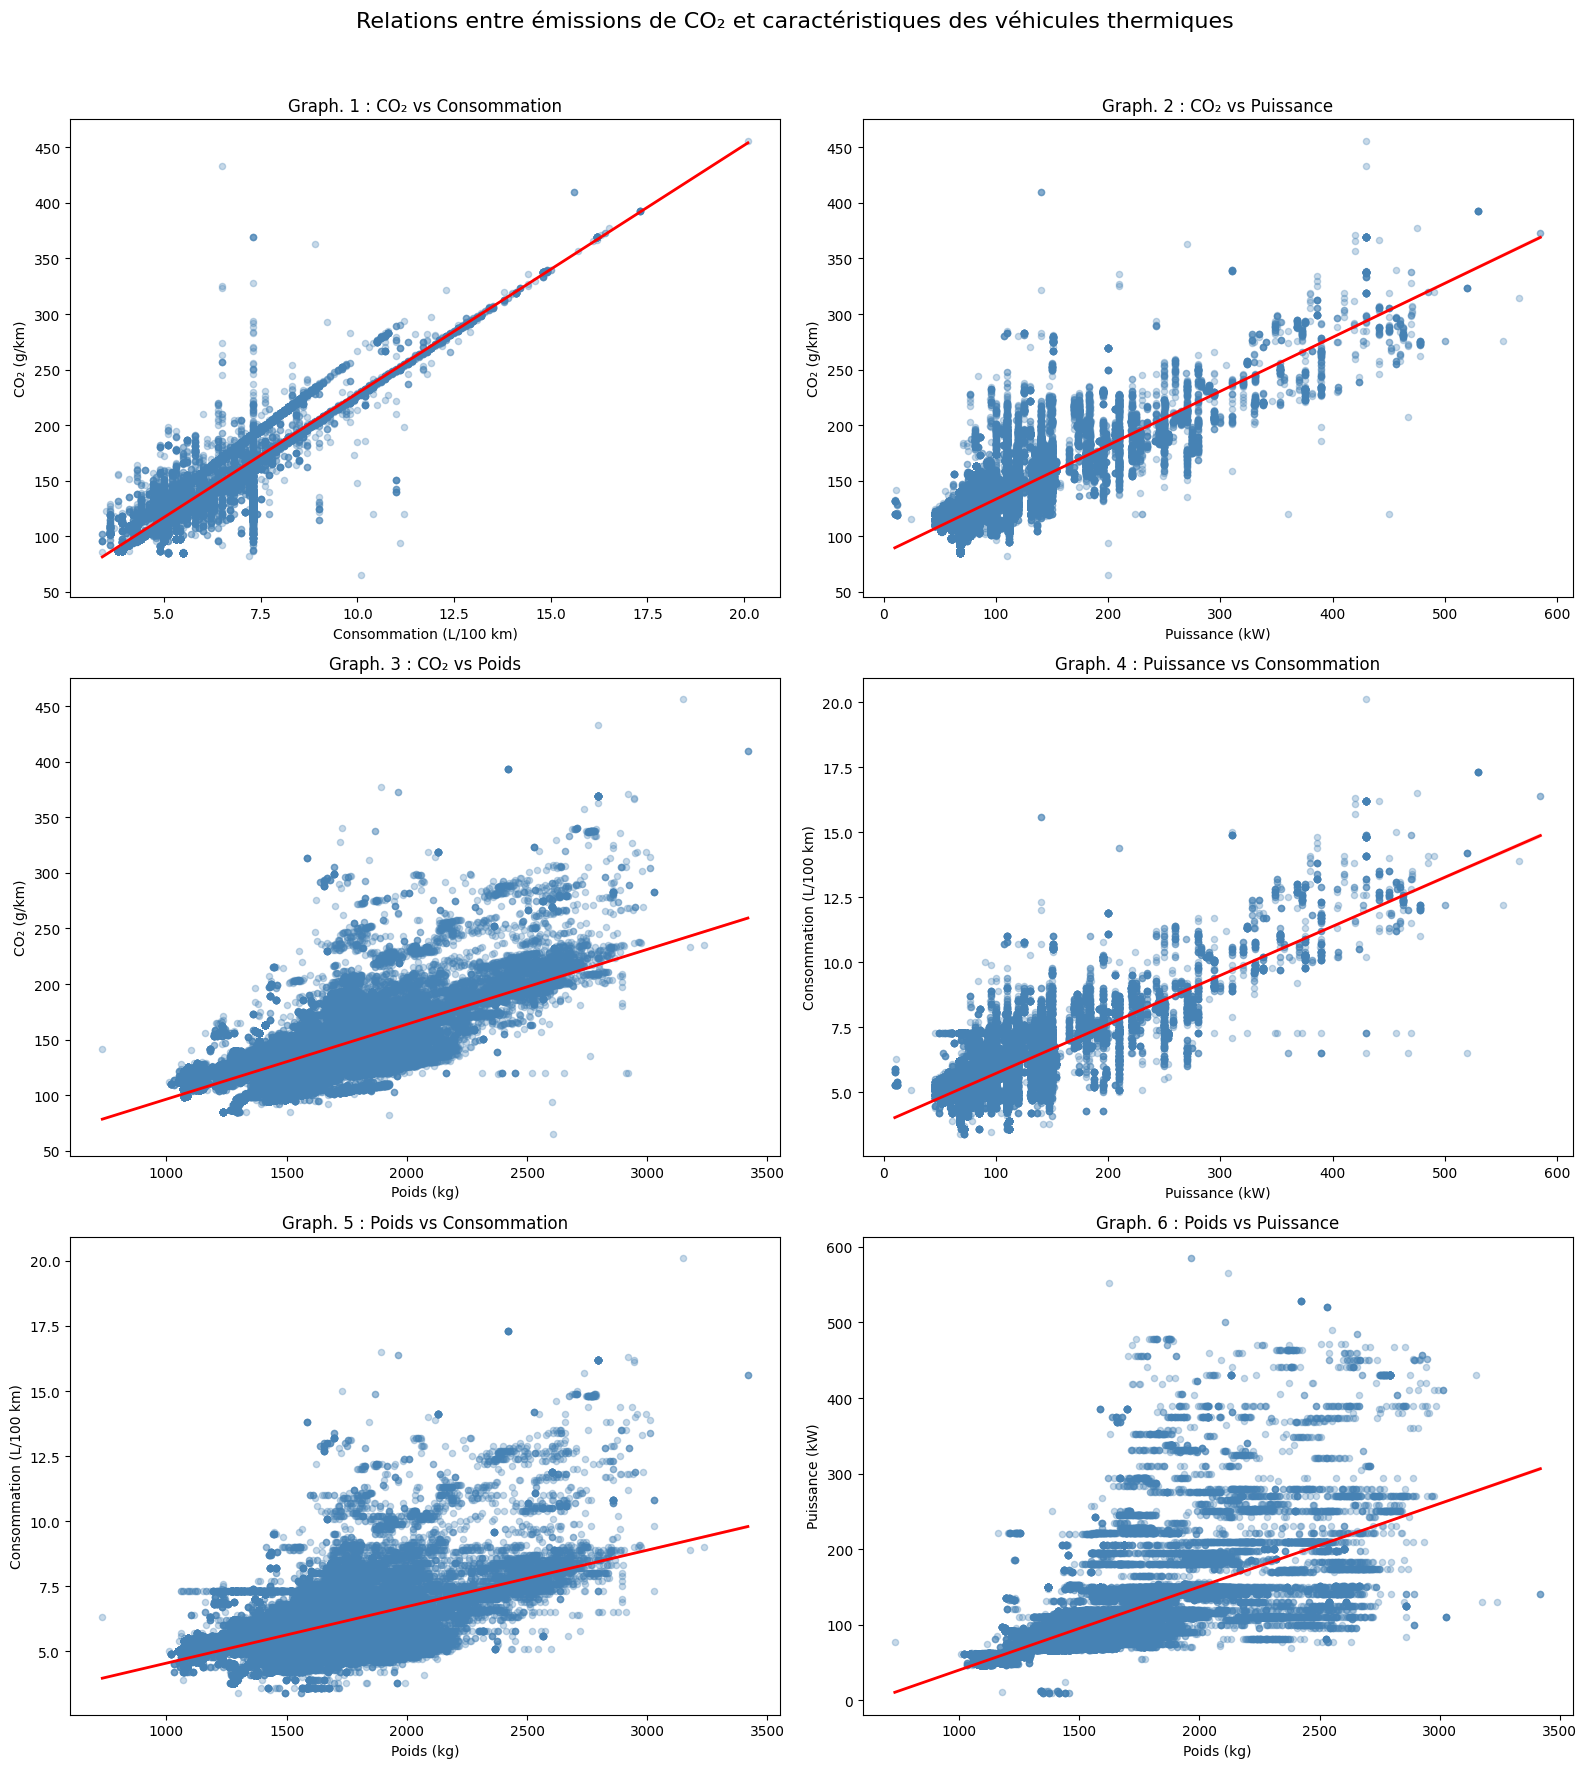

In [ ]:
# Nuages de points avec droite de régression linéaire pour les véhicules thermiques

df_sample = df_thermique.sample(100000)

# Création de la figure et de la grille
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

fig.suptitle(
    "Relations entre émissions de CO₂ et caractéristiques des véhicules thermiques",
    fontsize=16
)

# Graphique 1 : CO2 vs Consommation
sns.regplot(
    x='Fuel consumption',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Graph. 1 : CO₂ vs Consommation')
axes[0, 0].set_xlabel('Consommation (L/100 km)')
axes[0, 0].set_ylabel('CO₂ (g/km)')

# Graphique 2 : CO2 vs Puissance
sns.regplot(
    x='Puissance_KW',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Graph. 2 : CO₂ vs Puissance')
axes[0, 1].set_xlabel('Puissance (kW)')
axes[0, 1].set_ylabel('CO₂ (g/km)')

# Graphique 3 : CO2 vs Poids
sns.regplot(
    x='WLTP_poids',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Graph. 3 : CO₂ vs Poids')
axes[1, 0].set_xlabel('Poids (kg)')
axes[1, 0].set_ylabel('CO₂ (g/km)')

# Graphique 4 : Puissance vs Consommation
sns.regplot(
    x='Puissance_KW',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 1]
)
axes[1, 1].set_title('Graph. 4 : Puissance vs Consommation')
axes[1, 1].set_xlabel('Puissance (kW)')
axes[1, 1].set_ylabel('Consommation (L/100 km)')

# Graphique 5 : Poids vs Consommation

sns.regplot(
    x='WLTP_poids',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 0]
)
axes[2, 0].set_title('Graph. 5 : Poids vs Consommation')
axes[2, 0].set_xlabel('Poids (kg)')
axes[2, 0].set_ylabel('Consommation (L/100 km)')

# Graphique 6 : Poids vs Puissance
sns.regplot(
    x='WLTP_poids',
    y='Puissance_KW',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 1]
)
axes[2, 1].set_title('Graph. 6 : Poids vs Puissance')
axes[2, 1].set_xlabel('Poids (kg)')
axes[2, 1].set_ylabel('Puissance (kW)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# Etude des véhicules électriques


In [ ]:
# Création d'un dataframe pour les véhicules électriques

df_ev = df[df['Type_Carburant'] == 'Electric']
df_ev = df_ev.drop(columns=['Co2_Emission(WLTP)', 'Fuel consumption'])
df_ev.head()

# Retrait des valeurs 'Electric range' à 0

df_ev = df_ev[df_ev['Electric range (km)'] != 0].reset_index(drop=True)


In [ ]:
# Descrition rapide de la distribution du panel de véhicules thermiques

variables_etudiees = ['WLTP_poids', 'Electric range (km)', 'Puissance_KW', 'Conso_Wh/km']
df_ev[variables_etudiees].describe()


,WLTP_poids,Electric range (km),Puissance_KW,Conso_Wh/km
count,1.356907e+06,1.356907e+06,1.356907e+06,1.356907e+06
mean,2.067559e+03,4.683420e+02,1.808965e+02,1.652799e+02
std,3.121952e+02,9.655981e+01,8.719249e+01,2.048430e+01
min,9.060000e+02,1.900000e+01,3.000000e+01,1.300000e+01
25%,1.897000e+03,4.140000e+02,1.150000e+02,1.540000e+02
50%,2.094000e+03,4.740000e+02,1.600000e+02,1.630000e+02
75%,2.270000e+03,5.330000e+02,2.200000e+02,1.720000e+02
max,3.410000e+03,8.830000e+02,9.680000e+02,5.790000e+02


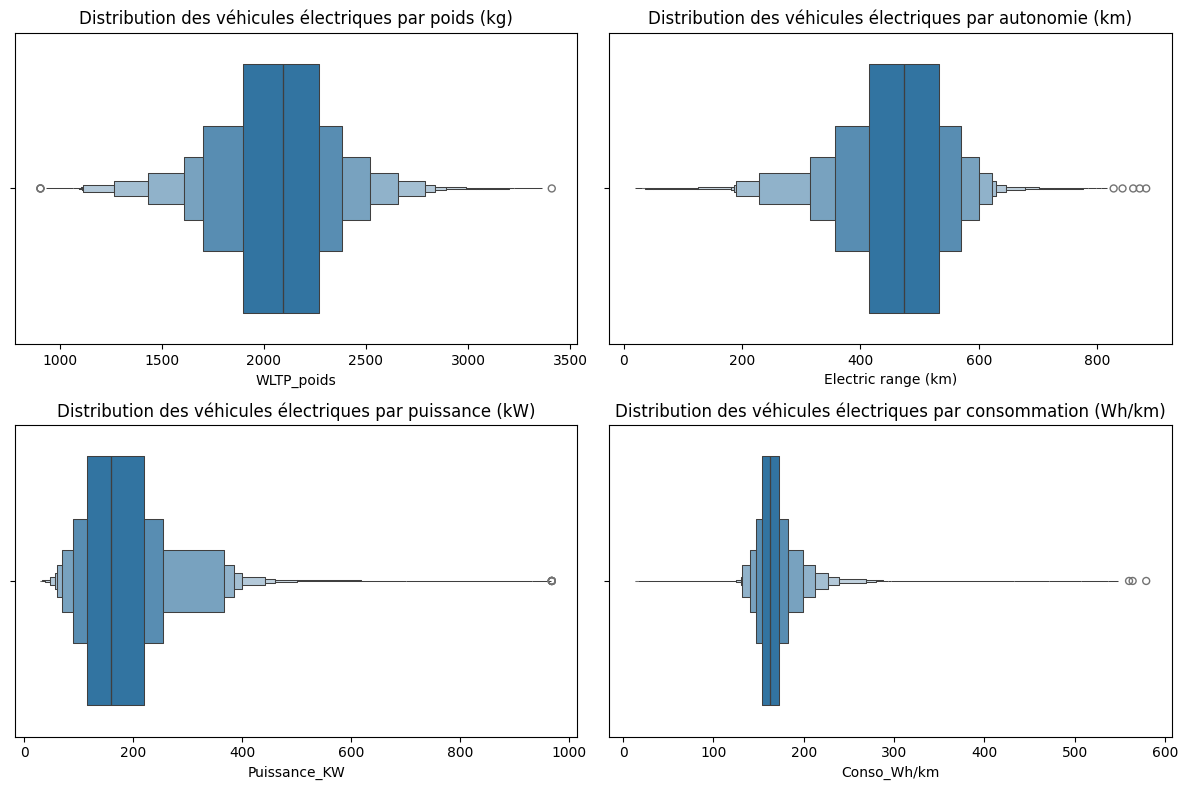

In [ ]:
# Identification et nettoyage des outliers avec des boites à moustaches pour les véhicules électriques

colonnes = ['WLTP_poids', 'Electric range (km)', 'Puissance_KW', 'Conso_Wh/km']
titres = [
    'Distribution des véhicules électriques par poids (kg)',
    'Distribution des véhicules électriques par autonomie (km)',
    'Distribution des véhicules électriques par puissance (kW)',
    'Distribution des véhicules électriques par consommation (Wh/km)'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_ev, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

In [ ]:
# Nettoyage des outliers identifiés des véhicules électriques

# Retrait des valeurs 'Puissance_KW' inférieures à 30
df_ev = df_ev[df_ev['Puissance_KW'] >= 30].reset_index(drop=True)

# Retrait des valeurs 'Conso_Wh/km' supérieures à 550
df_ev = df_ev[df_ev['Conso_Wh/km'] <= 580].reset_index(drop=True)


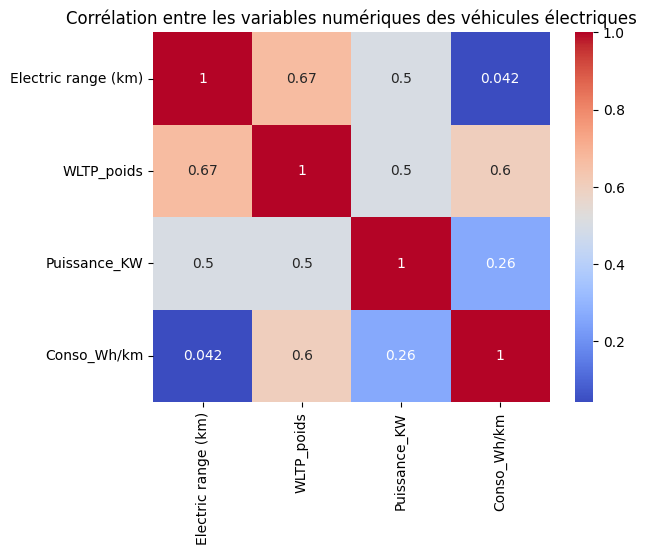

In [ ]:
# Matrice de corrélation (heatmap) entre les variables numériques des véhicules électriques

numeric_vars = ['Electric range (km)', 'WLTP_poids', 'Puissance_KW', 'Conso_Wh/km']
corr_matrix = df_ev[numeric_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables numériques des véhicules électriques')
plt.show()

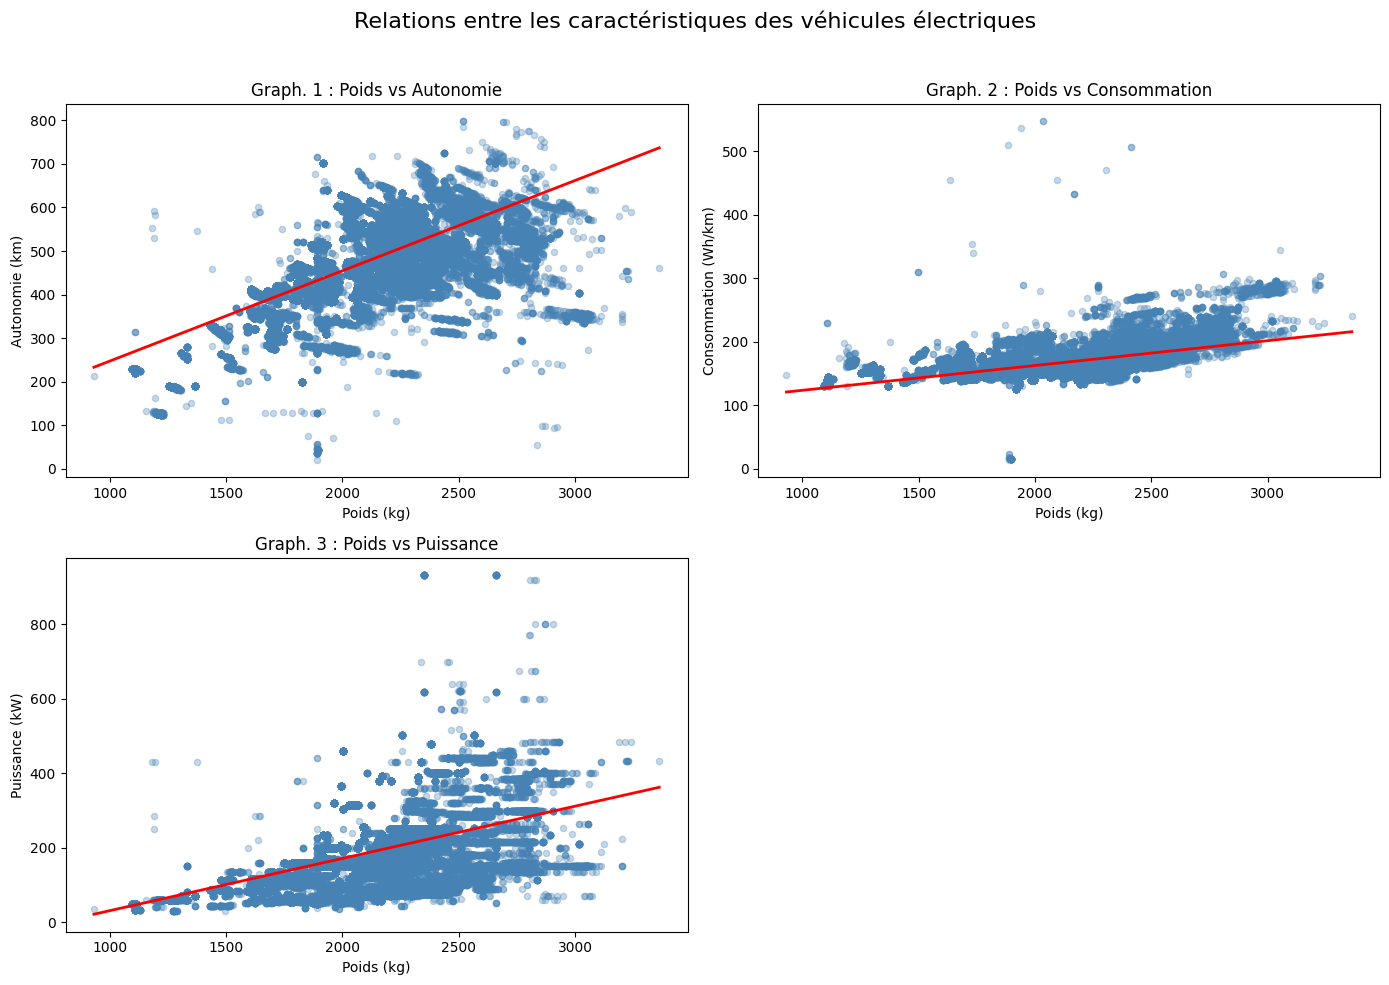

In [ ]:
# Nuages de points avec droite de régression linéaire pour les véhicules électriques

df_ev_sample = df_ev.sample(100000)

# Création de la figure et de la grille
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle(
    "Relations entre les caractéristiques des véhicules électriques",
    fontsize=16
)

# Graphique 1 : Poids vs Autonomie
sns.regplot(
    x='WLTP_poids',
    y='Electric range (km)',
    data=df_ev_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Graph. 1 : Poids vs Autonomie')
axes[0, 0].set_xlabel('Poids (kg)')
axes[0, 0].set_ylabel('Autonomie (km)')

# Graphique 2 : Poids vs Consommation
sns.regplot(
    x='WLTP_poids',
    y='Conso_Wh/km',
    data=df_ev_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Graph. 2 : Poids vs Consommation')
axes[0, 1].set_xlabel('Poids (kg)')
axes[0, 1].set_ylabel('Consommation (Wh/km)')

# Graphique 3 : Poids vs Puissance
sns.regplot(
    x='WLTP_poids',
    y='Puissance_KW',
    data=df_ev_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Graph. 3 : Poids vs Puissance')
axes[1, 0].set_xlabel('Poids (kg)')
axes[1, 0].set_ylabel('Puissance (kW)')

axes[1, 1].axis("off")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Composition du parc automobile

**Visualisations par etiquette Co2**


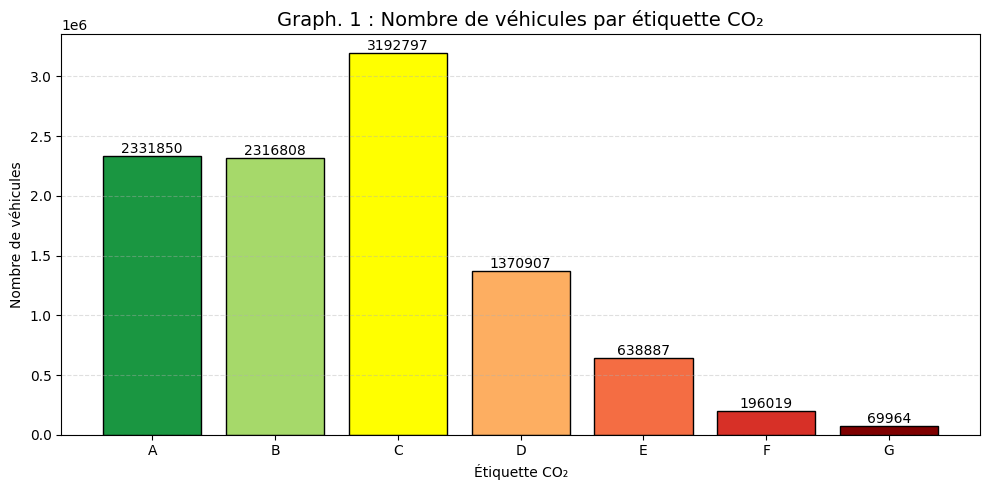

In [ ]:
# Visualiser le nombre d'occurences par etiquette Co2

# Respect de l'ordre des étiquettes
etiquette_order = ["A", "B", "C", "D", "E", "F", "G"]

# Respect des couleurs officielles
etiquette_colors = {
    "A": "#1a9641",  # vert foncé
    "B": "#a6d96a",  # vert clair
    "C": "#ffff00",  # jaune
    "D": "#fdae61",  # orange
    "E": "#f46d43",  # rouge clair
    "F": "#d73027",  # rouge
    "G": "#7f0000"   # bordeaux
}

# Comptage des occurrences
counts = (
    df["Etiquette_CO2"]
    .value_counts()
    .reindex(etiquette_order)
)

# Création du graphique
plt.figure(figsize=(10, 5))
bars = plt.bar(
    counts.index,
    counts.values,
    color=[etiquette_colors[e] for e in counts.index],
    edgecolor="black"
)

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=10
        )

# Mise en forme
plt.title("Graph. 1 : Nombre de véhicules par étiquette CO₂", fontsize=14)
plt.xlabel("Étiquette CO₂")
plt.ylabel("Nombre de véhicules")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()






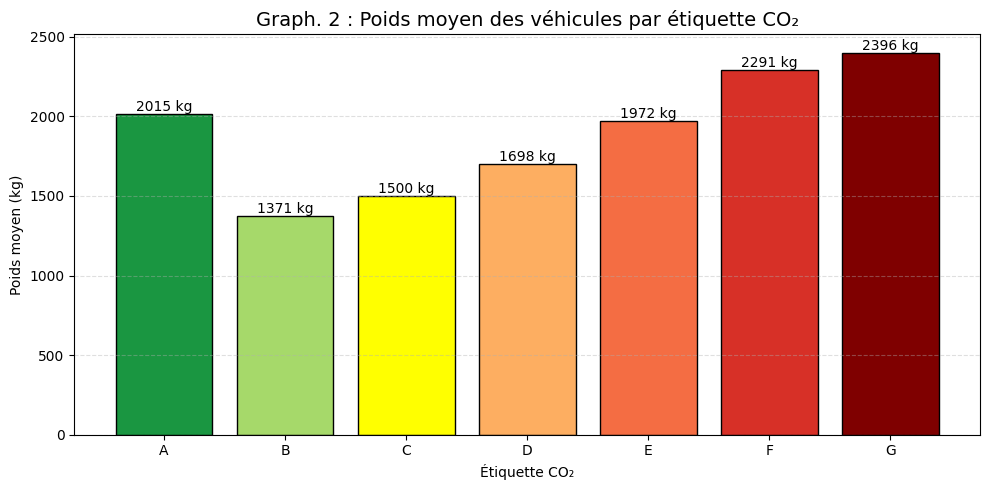

In [ ]:
# Visualisation du poids moyen par etiquette Co2

# Ordre officiel des étiquettes
etiquette_order = ["A", "B", "C", "D", "E", "F", "G"]

# Couleurs officielles (UE)
etiquette_colors = {
    "A": "#1a9641",  # vert foncé
    "B": "#a6d96a",  # vert clair
    "C": "#ffff00",  # jaune
    "D": "#fdae61",  # orange
    "E": "#f46d43",  # rouge clair
    "F": "#d73027",  # rouge
    "G": "#7f0000"   # bordeaux
}

# Calcul du poids moyen par étiquette
mean_weight = (
    df.groupby("Etiquette_CO2")["WLTP_poids"]
      .mean()
      .reindex(etiquette_order)
)

# Création du graphique
plt.figure(figsize=(10, 5))
bars = plt.bar(
    mean_weight.index,
    mean_weight.values,
    color=[etiquette_colors[e] for e in mean_weight.index],
    edgecolor="black"
)

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    if not pd.isna(height):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.0f} kg",
            ha="center",
            va="bottom",
            fontsize=10
        )

# Mise en forme
plt.title("Graph. 2 : Poids moyen des véhicules par étiquette CO₂", fontsize=14)
plt.xlabel("Étiquette CO₂")
plt.ylabel("Poids moyen (kg)")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


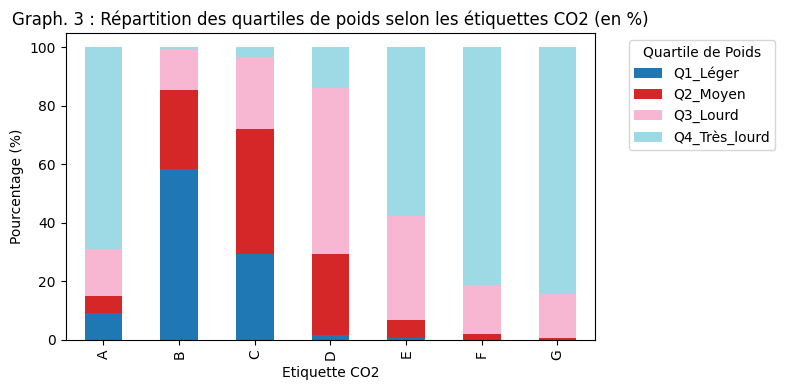

In [ ]:
# Distribution des étiquettes Co2 par quartiles de poids

# Création d'un tableau croisé
table = pd.crosstab(df['Etiquette_CO2'], df['Poids_Quartile'])

# Normaliser pour obtenir des pourcentages par étiquette CO2
table_percent = table.div(table.sum(axis=1), axis=0) * 100

# Graphique à barres empilées en pourcentage
table_percent.plot(kind='bar', stacked=True, figsize=(8,4), colormap='tab20')

plt.title('Graph. 3 : Répartition des quartiles de poids selon les étiquettes CO2 (en %)')
plt.xlabel('Etiquette CO2')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Quartile de Poids', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



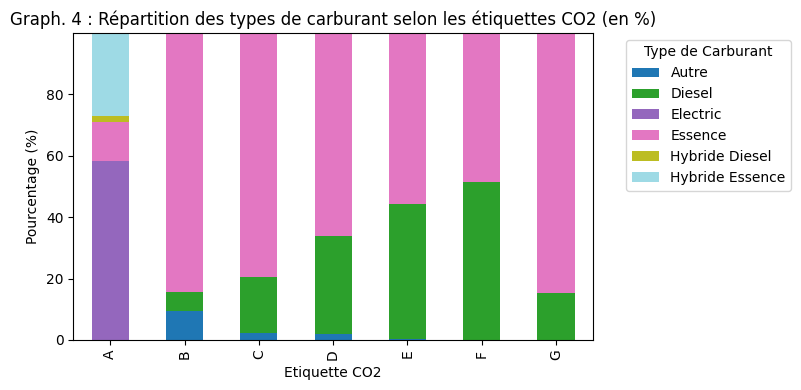

In [ ]:
# Distribution des étiquettes Co2 par types de carburant

# Création d'un tableau croisé en %
table = pd.crosstab(df['Etiquette_CO2'], df['Type_Carburant'])
table_percent = table.div(table.sum(axis=1), axis=0) * 100

# Graphique à barres empilées en pourcentage
table_percent.plot(kind='bar', stacked=True, figsize=(8,4), colormap='tab20')

plt.title('Graph. 4 : Répartition des types de carburant selon les étiquettes CO2 (en %)')
plt.xlabel('Etiquette CO2')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Type de Carburant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Visualisations par quartile de poids


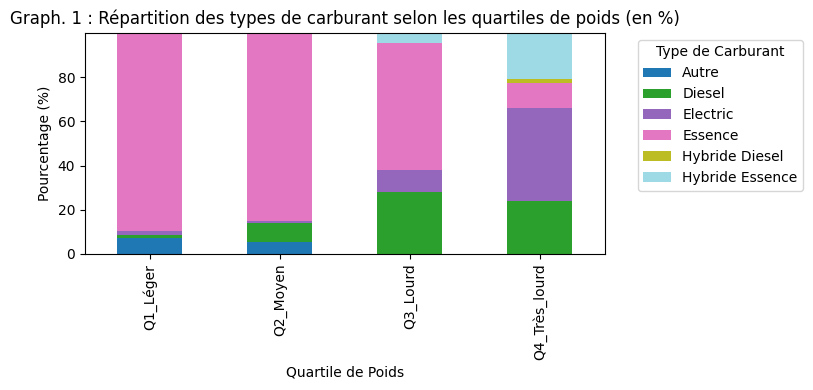

In [ ]:
# Visualisation de la distribution des types de carburant par quartiles de poids

# Création d'un tableau croisé
table = pd.crosstab(df['Poids_Quartile'], df['Type_Carburant'])
table_percent = table.div(table.sum(axis=1), axis=0) * 100


# Graphique à barres empilées en pourcentage
table_percent.plot(kind='bar', stacked=True, figsize=(8,4), colormap='tab20')

plt.title('Graph. 1 : Répartition des types de carburant selon les quartiles de poids (en %)')
plt.xlabel('Quartile de Poids')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Type de Carburant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-724187387.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


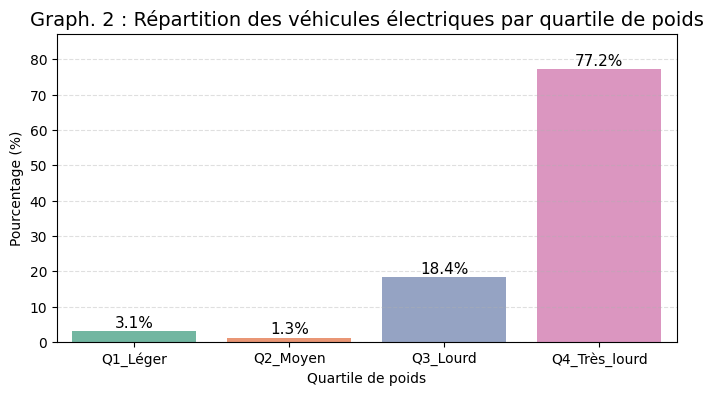

In [ ]:
# Visualisation de la distribution des quartiles de poids pour les véhicules électriques

# Calcul du pourcentage par quartile
quartile_counts = df_ev['Poids_Quartile'].value_counts().sort_index()
quartile_pct = (quartile_counts / quartile_counts.sum()) * 100

# Création du graphique
plt.figure(figsize=(8, 4))
sns.barplot(
    x=quartile_pct.index,
    y=quartile_pct.values,
    palette=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
)

# Ajout des pourcentages au-dessus de chaque barre
for i, pct in enumerate(quartile_pct.values):
    plt.text(i, pct + 1, f"{pct:.1f}%", ha='center', fontsize=11)

plt.title("Graph. 2 : Répartition des véhicules électriques par quartile de poids", fontsize=14)
plt.xlabel("Quartile de poids")
plt.ylabel("Pourcentage (%)")
plt.ylim(0, quartile_pct.values.max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()




**Visualisations par quartiles de puissance**

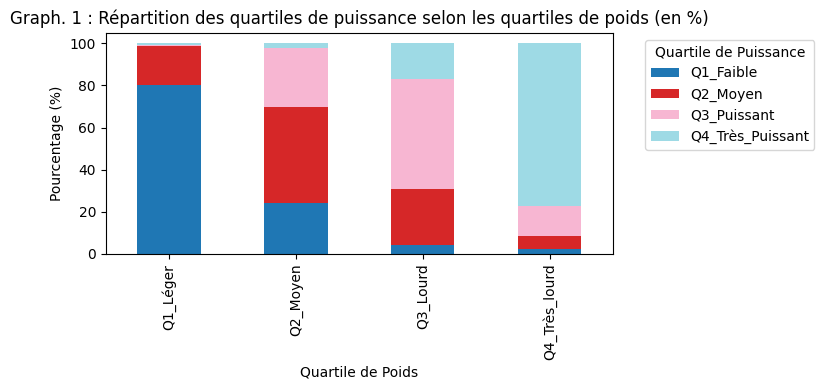

In [ ]:
# Répartition des quartiles de puissance selon les quartiles de poids

# Création d'un tableau croisé (en %)
table = pd.crosstab(df['Poids_Quartile'], df['PuissanceKW_Quartile'])
table_percent = table.div(table.sum(axis=1), axis=0) * 100

# Graphique à barres empilées en pourcentage
table_percent.plot(kind='bar', stacked=True, figsize=(8,4), colormap='tab20')

plt.title('Graph. 1 : Répartition des quartiles de puissance selon les quartiles de poids (en %)')
plt.xlabel('Quartile de Poids')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Quartile de Puissance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


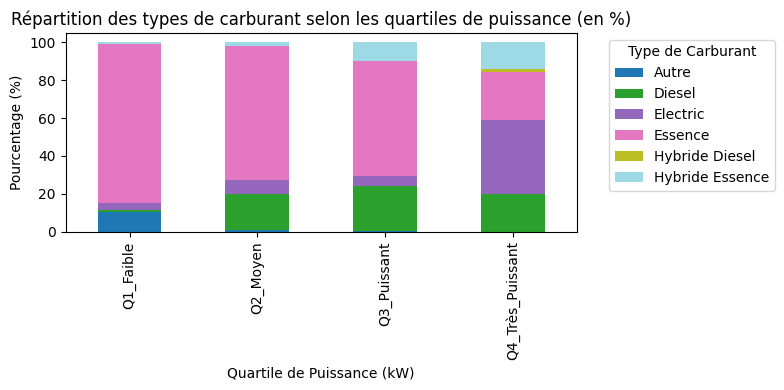

In [ ]:
# Répartition des types de carburant selon les quartiles de puissance

# Création d'un tableau croisé (en %)
table = pd.crosstab(df['PuissanceKW_Quartile'], df['Type_Carburant'])
table_percent = table.div(table.sum(axis=1), axis=0) * 100

# Graphique à barres empilées en pourcentage
table_percent.plot(kind='bar', stacked=True, figsize=(8,4), colormap='tab20')

plt.title('Répartition des types de carburant selon les quartiles de puissance (en %)')
plt.xlabel('Quartile de Puissance (kW)')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Type de Carburant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


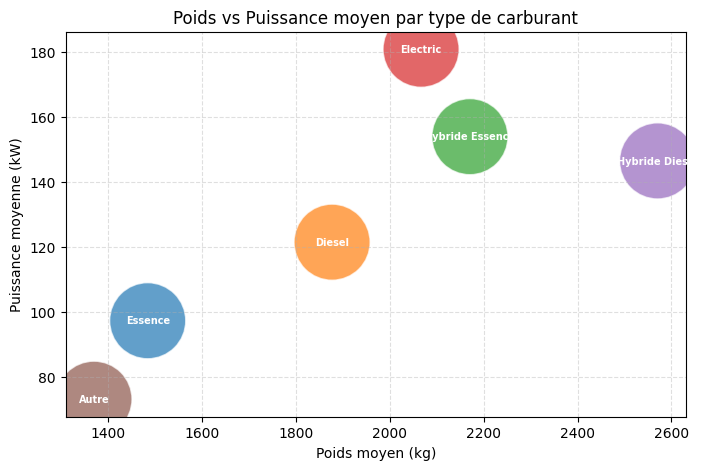

In [ ]:
# Graphique à bulles pour representer les types de carburants en fonction de leur poids moyen et puissance moyenne

# Regroupement par type de carburant
df_grouped = df.groupby('Type_Carburant').agg(
    poids_moy=('WLTP_poids', 'mean'),
    puissance_moy=('Puissance_KW', 'mean')
).reset_index()

# Couleurs pour les carburants
carburant_colors = {
    'Essence': '#1f77b4',
    'Electric': '#d62728',
    'Diesel': '#ff7f0e',
    'Hybride Essence': '#2ca02c',
    'Hybride Diesel': '#9467bd',
    'Autre': '#8c564b'
}

# Création du graphique
plt.figure(figsize=(8, 5))
plt.scatter(
    df_grouped['poids_moy'],
    df_grouped['puissance_moy'],
    s = 3000,
    c=[carburant_colors[c] for c in df_grouped['Type_Carburant']],
    alpha=0.7,
    edgecolors='w'
)

# Ajouter labels sur chaque bulle
for i, row in df_grouped.iterrows():
    plt.text(
        row['poids_moy'],
        row['puissance_moy'],
        row['Type_Carburant'],
        ha='center',
        va='center',
        fontsize=7,
        color='white',
        weight='bold'
    )
plt.xlabel("Poids moyen (kg)")
plt.ylabel("Puissance moyenne (kW)")
plt.title("Poids vs Puissance moyen par type de carburant")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

